In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import shutil

import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
import json


import seaborn as sb
import torch
from torch import nn
from torch import optim
from torch.autograd import Variable
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from collections import OrderedDict
import matplotlib.image as mpimg
import torchvision
import collections
import h5py

from PIL import Image

In [2]:
train_filenames = os.listdir('train')
train_cat = list(filter(lambda x:x[:3] == 'cat', train_filenames))
train_dog = list(filter(lambda x:x[:3] == 'dog', train_filenames))
# len_split_cat = int(len(train_cat)*0.8)
# len_split_dog = int(len(train_dog)*0.8)
def rmrf_mkdir(dirname):
    if os.path.exists(dirname):
        shutil.rmtree(dirname)
    os.mkdir(dirname)

rmrf_mkdir('train2')
os.mkdir('train2\\cat')
os.mkdir('train2\\dog')


for filename in train_cat:
    os.symlink('E:\\AI\\MLND_CN_P7_DogvsCat\\train\\'+filename, 'train2\\cat\\'+filename)

for filename in train_dog:
    os.symlink('E:\\AI\\MLND_CN_P7_DogvsCat\\train\\'+filename, 'train2\\dog\\'+filename)

    
test_filenames = os.listdir('test')
test_filenames_no_jpg = list([x[:-4] for x in test_filenames])


rmrf_mkdir('test2')
for filename_no_jpg, filename in zip(test_filenames_no_jpg, test_filenames):
    rmrf_mkdir('test2\\' + filename_no_jpg)

    os.symlink('E:\\AI\\MLND_CN_P7_DogvsCat\\test\\'+filename, 'test2\\' + filename_no_jpg + '\\' + filename)

In [3]:
train_dir = 'E:\\AI\\MLND_CN_P7_DogvsCat\\train2'
test_dir = 'E:\\AI\\MLND_CN_P7_DogvsCat\\test2'

In [4]:
def load_data():   
    train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                               transforms.Resize(255),
                                               transforms.RandomResizedCrop(224),
                                               transforms.RandomHorizontalFlip(),
                                               transforms.ToTensor(),
                                               transforms.Normalize([0.485, 0.456, 0.406], 
                                                                    [0.229, 0.224, 0.225])])
    test_transforms = transforms.Compose([transforms.Resize(255),
                                           transforms.CenterCrop(224),
                                           transforms.ToTensor(),
                                           transforms.Normalize([0.485, 0.456, 0.406], 
                                                                [0.229, 0.224, 0.225])])

    train_datasets = datasets.ImageFolder(train_dir, transform=train_transforms)
    test_datasets = datasets.ImageFolder(test_dir, transform=test_transforms)

    train_loader = torch.utils.data.DataLoader(train_datasets, batch_size=16, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_datasets, batch_size=16)
    return train_datasets, test_datasets, train_loader, test_loader

In [5]:
train_datasets, test_datasets, train_loader, test_loader = load_data()

In [6]:
classes = train_datasets.classes
classes_index = train_datasets.class_to_idx
print(classes)
print(classes_index)
print(test_datasets.classes[:20])

['cat', 'dog']
{'cat': 0, 'dog': 1}
['1', '10', '100', '1000', '10000', '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10008', '10009', '1001', '10010', '10011', '10012', '10013', '10014']


['cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'dog']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


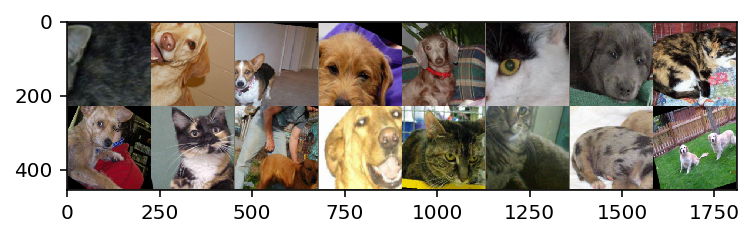

In [7]:
X_train,y_train = next(iter(train_loader))
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
img = torchvision.utils.make_grid(X_train)
img = img.numpy().transpose((1,2,0))
img = img*std + mean

print([classes[i] for i in y_train])
plt.imshow(img)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


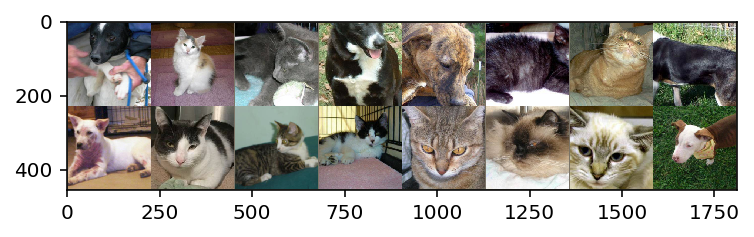

In [8]:
X_test,y_test = next(iter(test_loader))
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
img = torchvision.utils.make_grid(X_test)
img = img.numpy().transpose((1,2,0))
img = img*std + mean

print([i.item() for i in y_test])
plt.imshow(img)

In [9]:
a = np.random.randint(1, 25001, 5)
b = np.random.randint(1, 12501, 5)
print(a, b)

[18525  3590 13572 13051  8297] [ 4246  2127  9003 12388  6375]


In [10]:
mpimg.imread('test\\{}.jpg'.format(6934)).shape

(336, 447, 3)

In [11]:
pa = np.array([])
pb = np.array([])
for m, n in zip(a, b):
    print(mpimg.imread('test\\{}.jpg'.format(n)).shape)


(90, 119, 3)
(499, 375, 3)
(369, 335, 3)
(240, 319, 3)
(375, 499, 3)
